#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm,boxcox
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 1.Data preprocessing

#### Importing the dataset

In [3]:
df=pd.read_csv("churn_modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df=df.iloc[:,3:]

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* So we dont have any null value

#### How each independent variable affecting the target variable

* Numerical variable
* Categorical variable

In [11]:
plt.style.use("ggplot")

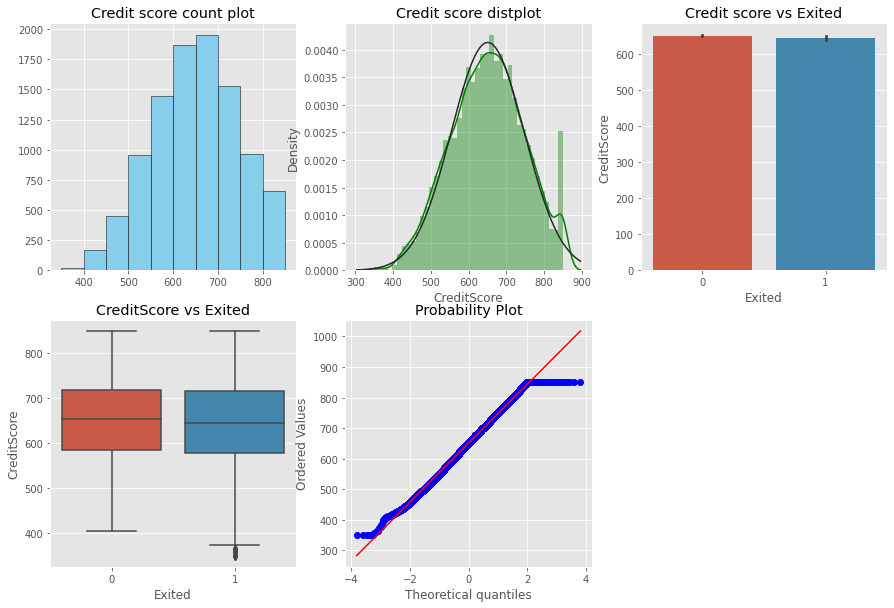

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["CreditScore"],color="skyblue",edgecolor="black")
plt.title("Credit score count plot")
plt.subplot(2,3,2)
sns.distplot(df["CreditScore"],fit=norm,color="green")
plt.title("Credit score distplot")
plt.subplot(2,3,3)
sns.barplot(df["Exited"],df["CreditScore"])
plt.title("Credit score vs Exited")
plt.subplot(2,3,4)
sns.boxplot(df["Exited"],df["CreditScore"])
plt.title("CreditScore vs Exited")
plt.subplot(2,3,5)
stats.probplot(df["CreditScore"],plot=plt)
plt.show()

* 1 From first plot we can see most of the customers have credit score b/w 600 to 700
* 2.From seonnd and fifth plot it seems the data is normal distributed
* 3.From third plot it is difficult to guess any effect of credit score on Exited

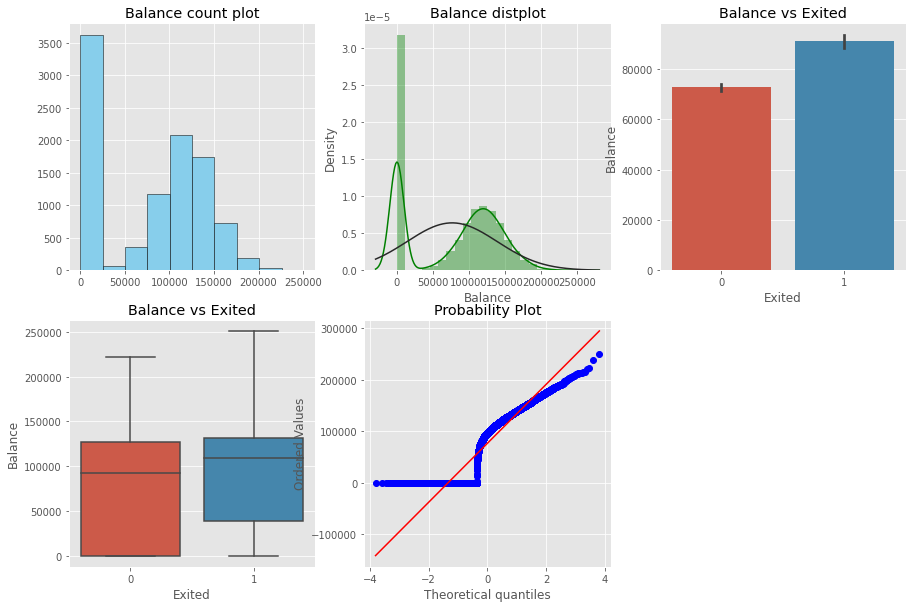

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["Balance"],color="skyblue",edgecolor="black")
plt.title("Balance count plot")
plt.subplot(2,3,2)
sns.distplot(df["Balance"],fit=norm,color="green")
plt.title("Balance distplot")
plt.subplot(2,3,3)
sns.barplot(df["Exited"],df["Balance"])
plt.title("Balance vs Exited")
plt.subplot(2,3,4)
sns.boxplot(df["Exited"],df["Balance"])
plt.title("Balance vs Exited")
plt.subplot(2,3,5)
stats.probplot(df["Balance"],plot=plt)
plt.show()

* 1.From the first plot we can see most of the customers have balance from 0 to 25000
* 2 From the third plot we can see those customers have more than 80000 in balance are more likely to leave

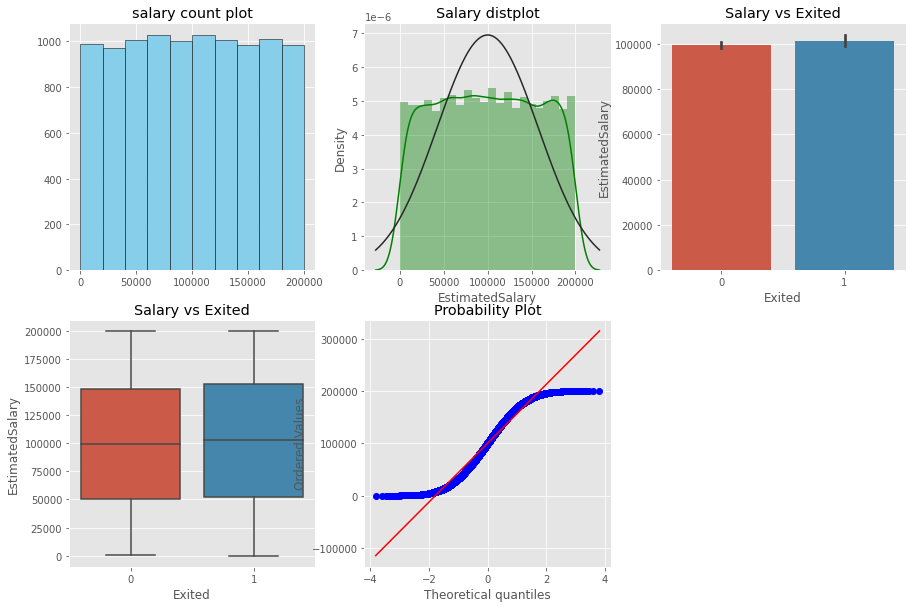

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["EstimatedSalary"],color="skyblue",edgecolor="black")
plt.title("salary count plot")
plt.subplot(2,3,2)
sns.distplot(df["EstimatedSalary"],fit=norm,color="green")
plt.title("Salary distplot")
plt.subplot(2,3,3)
sns.barplot(df["Exited"],df["EstimatedSalary"])
plt.title("Salary vs Exited")
plt.subplot(2,3,4)
sns.boxplot(df["Exited"],df["EstimatedSalary"])
plt.title("Salary vs Exited")
plt.subplot(2,3,5)
stats.probplot(df["EstimatedSalary"],plot=plt)
plt.show()

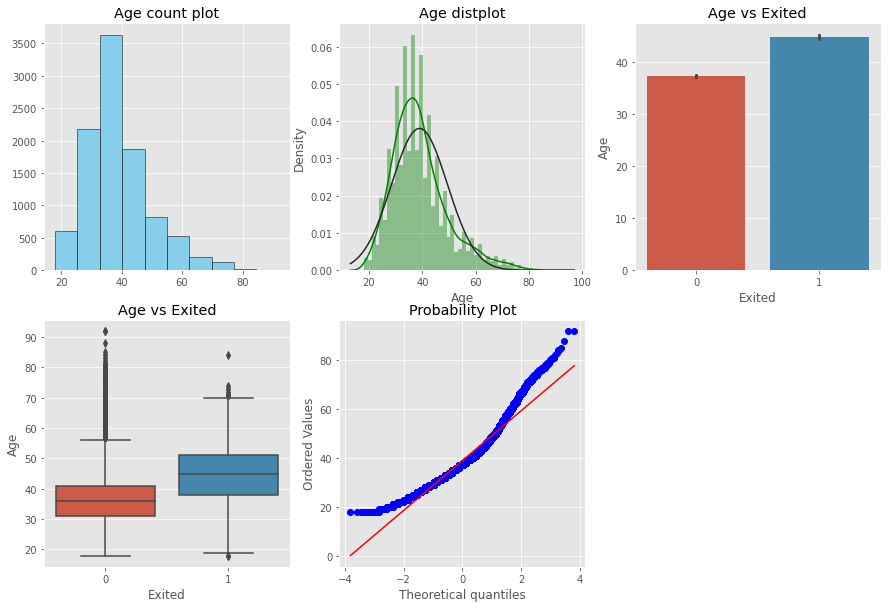

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["Age"],color="skyblue",edgecolor="black")
plt.title("Age count plot")
plt.subplot(2,3,2)
sns.distplot(df["Age"],fit=norm,color="green")
plt.title("Age distplot")
plt.subplot(2,3,3)
sns.barplot(df["Exited"],df["Age"])
plt.title("Age vs Exited")
plt.subplot(2,3,4)
sns.boxplot(df["Exited"],df["Age"])
plt.title("Age vs Exited")
plt.subplot(2,3,5)
stats.probplot(df["Age"],plot=plt)
plt.show()

* 1.From the first plot we can see most of cutomers have age from 20 to 40 years
* 2.From the thrid plot we can see those customers have age more than 40 years are more likely to leave
* 3.From the fourth plot we can also see the median difference 

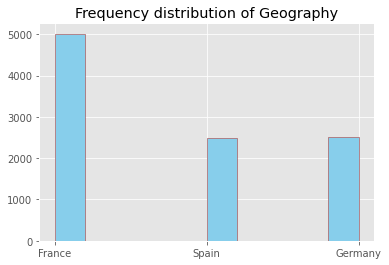

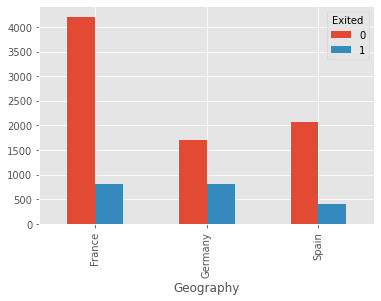

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df["Geography"],color="skyblue",edgecolor="brown")
plt.title ("Frequency distribution of Geography")
pd.crosstab(df["Geography"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see in our dataset lot of customers are from France
* From the second plot we can see customers from spain are less likely to leave

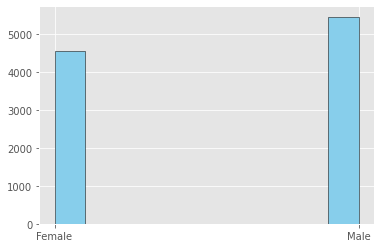

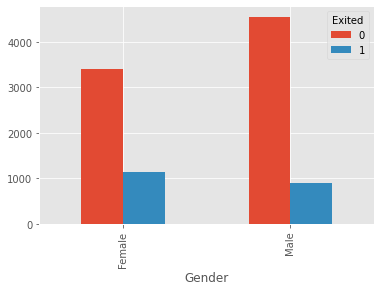

In [17]:
plt.figure(figsize=(6,4))
plt.hist(df["Gender"],color="skyblue",edgecolor="black")
pd.crosstab(df["Gender"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see males are more than female
* From the second plot we can see female are more likely to leave

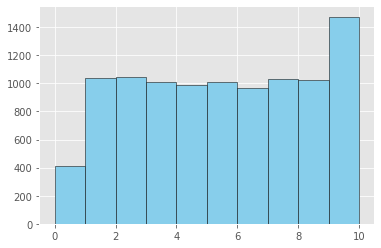

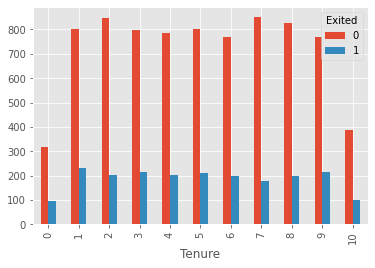

In [18]:
plt.figure(figsize=(6,4))
plt.hist(df["Tenure"],color="skyblue",edgecolor="black")
pd.crosstab(df["Tenure"],df["Exited"]).plot(kind="bar")
plt.show()

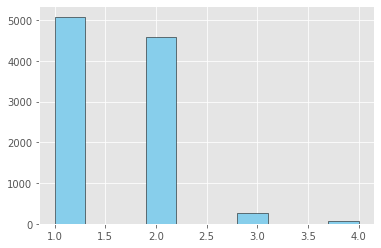

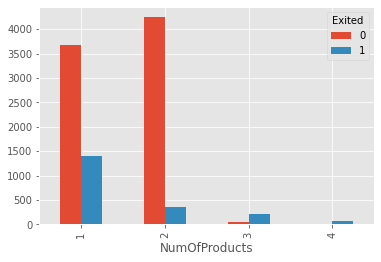

In [19]:
plt.figure(figsize=(6,4))
plt.hist(df["NumOfProducts"],color="skyblue",edgecolor="black")
pd.crosstab(df["NumOfProducts"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see most of customers have taken only one product(like personal loan,education loan)
* From the second plot we can see the trend like if the customer have taken more products are less likely to leave the bank

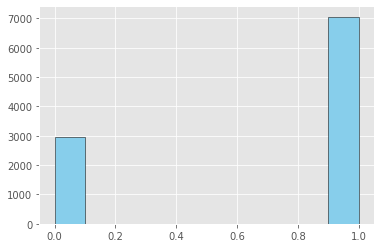

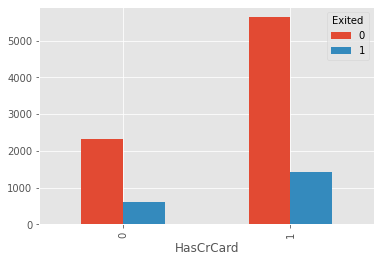

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df["HasCrCard"],color="skyblue",edgecolor="black")
pd.crosstab(df["HasCrCard"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see lot of customers have credit card(1 means yes)
* From the second plot we cant comment we need to take in terms of percentage then
we will decide

In [21]:
df[df["HasCrCard"]==0]["Exited"].value_counts(normalize=True)

0    0.791851
1    0.208149
Name: Exited, dtype: float64

In [22]:
df[df["HasCrCard"]==1]["Exited"].value_counts(normalize=True)

0    0.798157
1    0.201843
Name: Exited, dtype: float64

* So there is no any effect on exited 

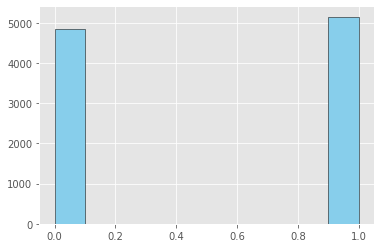

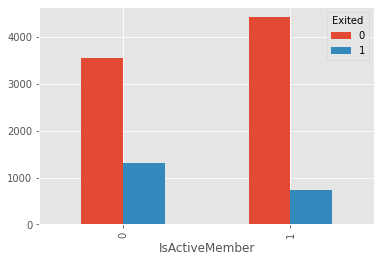

In [23]:
plt.figure(figsize=(6,4))
plt.hist(df["IsActiveMember"],color="skyblue",edgecolor="black")
pd.crosstab(df["IsActiveMember"],df["Exited"]).plot(kind="bar")
plt.show()

* From the first plot we can see slightly more number of customers are activemember
* From the second plto we can see those customers who are activemember are less likely to leave

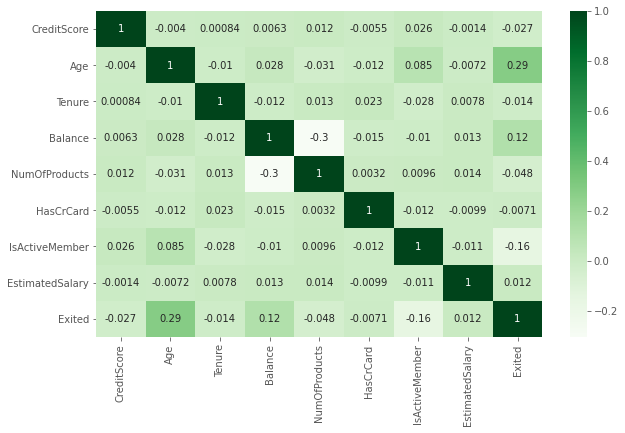

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()

* So there is no multicolinearity in the dataset

#### Analysis of dependent variable

In [25]:
values=df["Exited"].value_counts().values
index=df["Exited"].value_counts().index

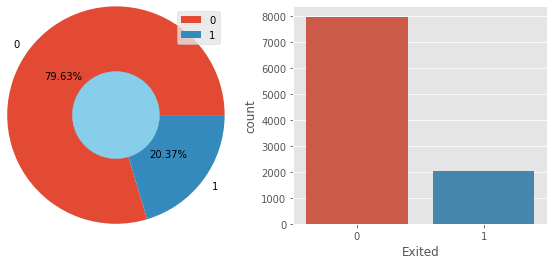

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pie(values,labels=index,radius=1.25,autopct="%0.2F%%")
my_circle=plt.Circle( (0,0), 0.5, color='skyblue')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.subplot(1,2,2)
sns.countplot(df["Exited"])
plt.show()

* From the plots we can see we have a imbalanced dataset we need to fix this

#### Checking outliers

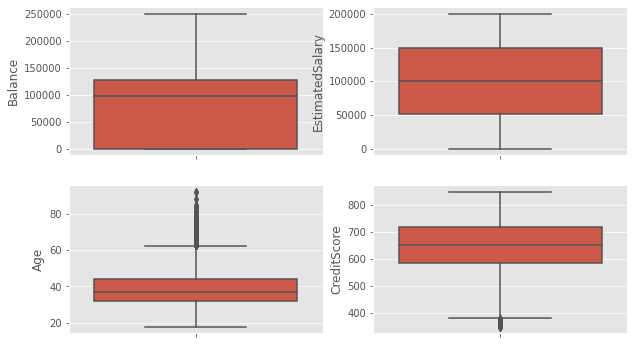

In [27]:
plt.figure(figsize=(10,6))
columns=["Balance","EstimatedSalary","Age","CreditScore"]
for i in range(0,len(columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[columns[i]])
plt.show()

* Actually we dont have outliers upper hence is continous to last data point
  means they are not extreme

#### Now we will remove skewness from data  
- Estimated Salary

In [28]:
df["EstimatedSalary"],lam_Estimated_Salary=boxcox(df["EstimatedSalary"])

#### Encoding categorical data
- gender column
- geography column

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [30]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
# fit_transform

In [31]:
df["Gender"].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

#### One hot encoding 

In [32]:
a=pd.get_dummies(df["Geography"])
a=a.drop(a.columns[-1],axis=1)
df=pd.concat([df,a],axis=1)
df.drop("Geography",axis=1,inplace=True)

In [33]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,5151.740581,1,1,0
1,608,0,41,1,83807.86,1,0,1,5550.872423,0,0,0
2,502,0,42,8,159660.80,3,1,0,5599.582848,1,1,0
3,699,0,39,1,0.00,2,0,0,4876.377126,0,1,0
4,850,0,43,2,125510.82,1,1,1,4317.352235,0,0,0


In [34]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

#### Spliting the dataset into train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

#### Balance the class Exited

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
# fit_resample

In [38]:
X,y=smote.fit_resample(X,y)

In [39]:
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
10919,677,0,53,7,148433.204332,1,0,0,5635.127965,0,0
2339,651,1,26,5,147037.320000,1,0,0,6542.789849,0,1
12854,555,0,44,5,0.000000,1,0,0,8202.927102,0,0
125,432,1,42,9,152603.450000,1,1,0,5470.631999,1,0
15084,676,0,45,3,0.000000,1,0,0,4789.603840,0,0


In [42]:
X_train.shape

(12740, 11)

In [43]:
y_train.head()

10919    1
2339     0
12854    1
125      1
15084    1
Name: Exited, dtype: int64

In [44]:
X_test.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
10878,600,0,43,7,81090.982942,1,1,1,7614.806988,0,0
13564,577,0,33,8,111487.087603,3,1,0,1072.648067,0,1
3959,663,1,49,7,116150.650000,3,1,1,4520.551874,0,1
12402,533,1,47,0,83458.709827,2,0,1,2953.374114,0,0
14151,631,0,55,3,116250.318350,1,0,0,2788.521418,0,1
11831,685,0,42,2,0.000000,1,0,0,4301.110787,1,0
7975,641,1,42,3,121765.370000,2,1,1,7337.437810,0,1
15433,577,0,38,4,112495.455085,1,0,0,8013.944485,0,0
9126,753,1,51,4,79811.720000,2,0,1,3887.622127,0,0
8928,623,0,29,1,0.000000,2,0,0,2627.310800,1,0


In [45]:
X_test.shape

(3186, 11)

#### Feature scalling

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=MinMaxScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

In [48]:
X_train.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
count,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.00000
mean,0.596397,0.416719,0.327581,0.482700,0.336732,0.141183,0.623312,0.372135,0.584704,0.393485,0.24843
std,0.184738,0.493035,0.142439,0.271966,0.253597,0.191136,0.484575,0.483393,0.265177,0.488542,0.43212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.470000,0.000000,0.228571,0.300000,0.000000,0.000000,0.000000,0.000000,0.377789,0.000000,0.00000
50%,0.598000,0.000000,0.314286,0.500000,0.424862,0.000000,1.000000,0.000000,0.612260,0.000000,0.00000
75%,0.724000,1.000000,0.414286,0.700000,0.533283,0.333333,1.000000,1.000000,0.812859,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [49]:
X_test.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,0.597539,0.407407,0.329172,0.483114,0.348110,0.138732,0.617389,0.371312,0.589671,0.382298,0.244821
std,0.183255,0.491429,0.145701,0.274340,0.251616,0.191947,0.486101,0.483232,0.262689,0.486025,0.430049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003182,0.000000,0.000000
25%,0.474000,0.000000,0.228571,0.300000,0.000000,0.000000,0.000000,0.000000,0.389564,0.000000,0.000000
50%,0.602000,0.000000,0.314286,0.500000,0.434207,0.000000,1.000000,0.000000,0.618364,0.000000,0.000000
75%,0.724000,1.000000,0.414286,0.700000,0.535708,0.333333,1.000000,1.000000,0.812558,1.000000,0.000000
max,1.000000,1.000000,1.057143,1.000000,1.035929,1.000000,1.000000,1.000000,0.999519,1.000000,1.000000


### 2.Building the ANN

#### Intializing the layer

In [50]:
from tensorflow.keras.models import Sequential

In [51]:
model=Sequential()

#### Adding the input layer and first hidden layer

In [52]:
model.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [53]:
# adding second hidden layer

In [54]:
model.add(tf.keras.layers.Dense(units=6,activation="relu"))

#### Adding output layer

In [55]:
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

### 3.Training the ANN

In [56]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Training the ANN on training set

In [57]:
model_history=model.fit(X_train,y_train,batch_size=32,epochs=100,validation_split=0.3)

Epoch 1/100
279/279 [==============================] - 2s 3ms/step - loss: 0.6673 - accuracy: 0.5714 - val_loss: 0.6080 - val_accuracy: 0.7119
Epoch 2/100
279/279 [==============================] - 1s 2ms/step - loss: 0.5415 - accuracy: 0.7481 - val_loss: 0.4977 - val_accuracy: 0.7645
Epoch 3/100
279/279 [==============================] - 1s 2ms/step - loss: 0.4838 - accuracy: 0.7734 - val_loss: 0.4784 - val_accuracy: 0.7752
Epoch 4/100
279/279 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.7752 - val_loss: 0.4719 - val_accuracy: 0.7773
Epoch 5/100
279/279 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.7784 - val_loss: 0.4681 - val_accuracy: 0.7766
Epoch 6/100
279/279 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.7810 - val_loss: 0.4661 - val_accuracy: 0.7786
Epoch 7/100
279/279 [==============================] - 1s 2ms/step - loss: 0.4584 - accuracy: 0.7807 - val_loss: 0.4636 - val_accuracy: 0.7786

Epoch 58/100
279/279 [==============================] - 1s 2ms/step - loss: 0.3869 - accuracy: 0.8219 - val_loss: 0.4028 - val_accuracy: 0.8140
Epoch 59/100
279/279 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8224 - val_loss: 0.4036 - val_accuracy: 0.8134
Epoch 60/100
279/279 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8223 - val_loss: 0.4021 - val_accuracy: 0.8142
Epoch 61/100
279/279 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8228 - val_loss: 0.4059 - val_accuracy: 0.8161
Epoch 62/100
279/279 [==============================] - 1s 2ms/step - loss: 0.3851 - accuracy: 0.8219 - val_loss: 0.4026 - val_accuracy: 0.8145
Epoch 63/100
279/279 [==============================] - 1s 2ms/step - loss: 0.3847 - accuracy: 0.8231 - val_loss: 0.4013 - val_accuracy: 0.8153
Epoch 64/100
279/279 [==============================] - 1s 2ms/step - loss: 0.3853 - accuracy: 0.8218 - val_loss: 0.4025 - val_accuracy:

#### Visualizing training and validation loss

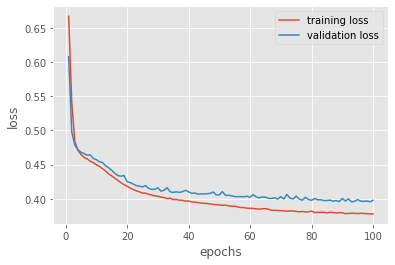

In [58]:
train_loss=model_history.history["loss"]
val_loss=model_history.history["val_loss"]
epochs=range(1,101)
plt.plot(epochs,train_loss,label="training loss")
plt.plot(epochs,val_loss,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

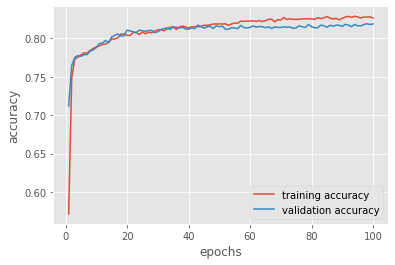

In [59]:
train_acc=model_history.history["accuracy"]
val_acc=model_history.history["val_accuracy"]
epochs=range(1,101)
plt.plot(epochs,train_acc,label="training accuracy")
plt.plot(epochs,val_acc,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### 4.Making the prediction and evaluating the model

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

In [61]:
model.predict(scaler.transform([[600,1,40,3,60000,2,1,1,50000,1,0]]))

array([[0.00753644]], dtype=float32)

#### Predicting the test set results

In [62]:
y_test_pred=model.predict(X_test)

In [63]:
y_test_pred=pd.DataFrame(y_test_pred)

In [64]:
y_test_pred=round(y_test_pred)

In [65]:
y_test=y_test.reset_index()

In [66]:
y_test.drop("index",axis=1,inplace=True)

In [67]:
prediction=pd.concat([y_test_pred,y_test],axis=1)

In [68]:
prediction.columns=["predicted","actual"]

In [69]:
prediction.head()

,predicted,actual
0,1.0,1
1,1.0,1
2,1.0,1
3,0.0,1
4,1.0,1


In [70]:
accuracy_score(y_test,y_test_pred)

0.8207784055241683

In [71]:
cf=confusion_matrix(y_test,y_test_pred)

In [72]:
cf

array([[1345,  245],
       [ 326, 1270]], dtype=int64)

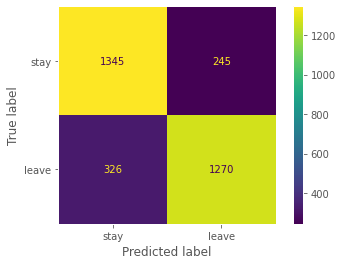

In [73]:
cmd=ConfusionMatrixDisplay(cf,display_labels=["stay","leave"])
cmd.plot()
plt.grid(False)

#### Precision and recall and F1 score

In [74]:
TP=cf[1][1]
predicted_leave=cf[1][1] + cf[0][1]
precision_for_leave=TP/predicted_leave

In [75]:
precision_for_leave

0.8382838283828383

In [76]:
TN=cf[0][0]
predicted_stay=cf[0][0] + cf[1][0]
precision_for_stay=TN/predicted_stay

In [77]:
precision_for_stay

0.8049072411729503

In [78]:
actual_leave=sum(cf[1][:])
recall_for_leave=TP/actual_leave
recall_for_leave

0.7957393483709273

In [79]:
actual_stay=sum(cf[0][:])
recall_for_stay=TN/actual_stay
recall_for_stay

0.8459119496855346

In [80]:
F1_score_for_leave=(2*precision_for_leave*recall_for_leave)/(precision_for_leave + recall_for_leave)
F1_score_for_leave

0.8164577306332369

In [81]:
F1_score_for_stay=(2*precision_for_stay*recall_for_stay)/(precision_for_stay + recall_for_stay)
F1_score_for_stay

0.8249003373198406

In [82]:
d={"parameter":["precision","recall","F1 score"],"stay":[precision_for_stay,recall_for_stay,F1_score_for_stay]
 ,"leave":[precision_for_leave,recall_for_leave,F1_score_for_leave]}

In [83]:
classification_report=pd.DataFrame(d)

In [84]:
classification_report

,parameter,stay,leave
0,precision,0.804907,0.838284
1,recall,0.845912,0.795739
2,F1 score,0.824900,0.816458


In [85]:
model.save("my_model.h5")

In [86]:
from tensorflow.keras.models import load_model

In [87]:
model1=load_model("my_model.h5")

In [88]:
model1.predict(scaler.transform([[600,1,40,3,60000,2,1,1,50000,1,0]]))

array([[0.00753644]], dtype=float32)

In [89]:
model1.predict(scaler.transform([[530,0,44,2,0,1,0,0,8079,1,0]]))

array([[0.93785965]], dtype=float32)